# 1. 강의영상 

{{< video https://youtu.be/playlist?list=PLQqh36zP38-y3qYQqLiUULvaSfkNtx1qy&si=NUMasaFTH1hqCDe_ >}}

# 2. Imports

In [104]:
import pandas as pd
import numpy as np
from plotnine import *

# 3. 예비학습.. 

## A. `dropna()`

`-` 결측치가 하나라도 포함된 모든 행을 제거하는 방법

In [2]:
df = pd.DataFrame({
    'A': [1,2,3,np.nan,5,6,7],
    'B': [11,np.nan,33,np.nan,55,66,77], 
    'C': [111,222,333,np.nan,555,666,np.nan]})
df

,A,B,C
0,1.0,11.0,111.0
1,2.0,NaN,222.0
2,3.0,33.0,333.0
3,NaN,NaN,NaN
4,5.0,55.0,555.0
5,6.0,66.0,666.0
6,7.0,77.0,NaN


In [3]:
df.dropna() # 결측치가 하나라도 포함되어 있으면 제거.

,A,B,C
0,1.0,11.0,111.0
2,3.0,33.0,333.0
4,5.0,55.0,555.0
5,6.0,66.0,666.0


## B. `_`

`-` 파이썬이 계산한 최근 결과는 `_`에 저장된다. 

In [4]:
a = [1,2,3]
a + [4] 

[1, 2, 3, 4]

In [5]:
_

[1, 2, 3, 4]

In [6]:
_ + [5] 

[1, 2, 3, 4, 5]

In [7]:
_.pop()

5

In [8]:
_ + 1

6

# 4. FIFA23 시각화 -- 문제

`# DV2022-중간고사-4-(2)의 변형`: 

아래는 FIFA22의 자료를 불러오는 코드이다. 

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


포지션별로 선수들의 능력치(`ShotPower`,`SlidingTackle`)와 급여(`Wage`)를 시각화하고 싶다. 아래의 세부지침에 맞추어 포지션별 `ShotPower`와 `SlidingTackle`의 산점도를 그려라. – (30점)

In [11]:
df.Position

0        <span class="pos pos18">CAM
1        <span class="pos pos11">LDM
2         <span class="pos pos24">RS
3        <span class="pos pos13">RCM
4          <span class="pos pos7">LB
                    ...             
16705    <span class="pos pos29">RES
16706    <span class="pos pos29">RES
16707    <span class="pos pos29">RES
16708    <span class="pos pos28">SUB
16709    <span class="pos pos28">SUB
Name: Position, Length: 16710, dtype: object

***세부지침***

**A**. Column의 이름에서 공백을 제거하라. 

**B**. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에 `.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.

**C**. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라. 변환된 값을 `df.Position`에 저장하라. 

In [12]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

{'GOALKEEPER': {'GK'},
 'DEFENDER': {'CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'},
 'MIDFIELDER': {'CAM',
  'CDM',
  'CM',
  'LAM',
  'LCM',
  'LDM',
  'LM',
  'RAM',
  'RCM',
  'RDM',
  'RM'},
 'FORWARD': {'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'},
 'SUB': {'SUB'},
 'RES': {'RES'}}

**D**. `df.Wage`를 적절하게 변환하라. 

**E**. `Position==“DEFENDER”` or `Position==“FORWARD”`에 해당하는 관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라. 이때 `Position`은 color로 구분하고 `Wage`는 size와 alpha로 구분하라.

--- 시각화예시 --- 

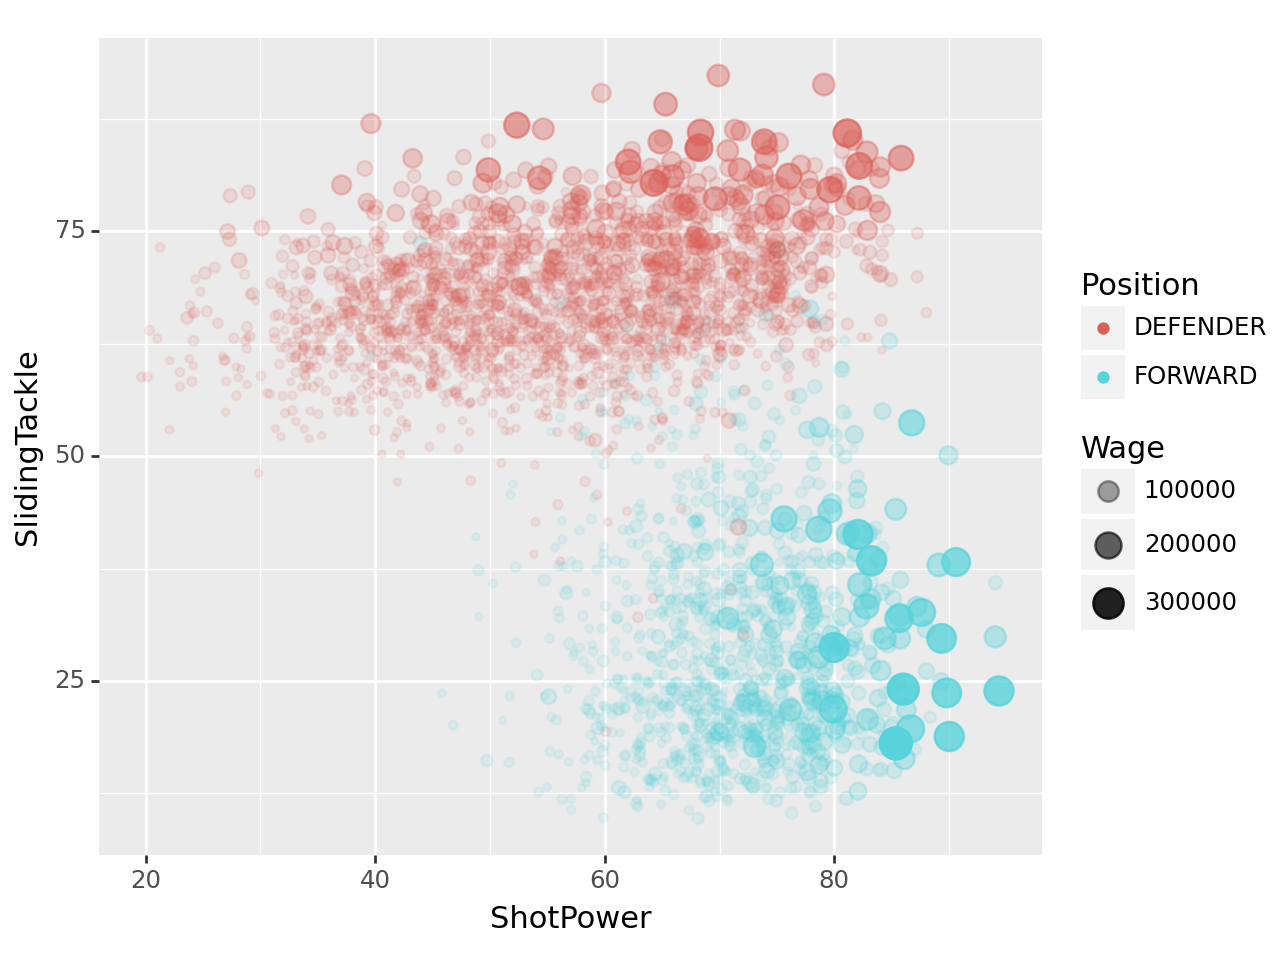

<Figure Size: (640 x 480)>

In [18]:
#

- 공격수들은 ShotPower가 큰 쪽에 몰려있고, 수비수들은 SlidingTackle이 큰 쪽에 몰려있다.
- 공격수들은 ShotPower가 높을수록 급여를 많이 받는다. 수비수들도 마찬가지로 SlidingTackle이 높을수록 급여를 많이 받는다.

# 4-1. 내 풀이

***세부지침***

**A**. Column의 이름에서 공백을 제거하라. 

**B**. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에 `.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.

**C**. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라. 변환된 값을 `df.Position`에 저장하라. 

**D**. `df.Wage`를 적절하게 변환하라. 

**E**. `Position==“DEFENDER”` or `Position==“FORWARD”`에 해당하는 관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라. 이때 `Position`은 color로 구분하고 `Wage`는 size와 alpha로 구분하라.

In [32]:
my_df = df.copy()

In [33]:
my_df.shape

(16710, 65)

In [34]:
## A Column의 이름에서 공백을 제거하라.
my_df.columns = ['_'.join(name.split(' ')) for name in my_df.columns]

In [35]:
## B 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에 .dropna()를 사용하여 결측치가 포함된 행을 제거하라.
cond = (my_df.isnull().sum()/my_df.shape[0] >= 0.5)
drop_cols = my_df.columns[cond].tolist()
my_df = my_df.drop(drop_cols, axis=1).dropna()

In [36]:
my_df.shape

(14398, 63)

In [40]:
## C position_dict를 이용하여 df.Position을 적절하게 변환하라. 변환된 값을 df.Position에 저장하라.
position_dict

{'GOALKEEPER': {'GK'},
 'DEFENDER': {'CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'},
 'MIDFIELDER': {'CAM',
  'CDM',
  'CM',
  'LAM',
  'LCM',
  'LDM',
  'LM',
  'RAM',
  'RCM',
  'RDM',
  'RM'},
 'FORWARD': {'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'},
 'SUB': {'SUB'},
 'RES': {'RES'}}

In [42]:
my_df['Position'] = my_df.Position.str.split('>').str[-1]

In [64]:
set('GOALKEEPER') in set(position_dict.keys())

False

In [98]:
my_df = my_df.assign(Position = [k for x in my_df['Position'] for k, v in position_dict.items() if x in v])

In [45]:
# 틀린 풀이 (이것 떄문에 그래프가 이상했었음..)
my_df.assign(Position = pd.Series([k for k,v in position_dict.items() for x in my_df.Position if x in v])).Position

0        GOALKEEPER
1        GOALKEEPER
2        GOALKEEPER
3        GOALKEEPER
4        GOALKEEPER
            ...    
16703           NaN
16704           NaN
16706           NaN
16707           NaN
16708           NaN
Name: Position, Length: 14398, dtype: object

In [99]:
my_df.Position

0        MIDFIELDER
1        MIDFIELDER
2           FORWARD
3        MIDFIELDER
4          DEFENDER
            ...    
16703           RES
16704           RES
16706           RES
16707           RES
16708           SUB
Name: Position, Length: 14398, dtype: object

In [100]:
my_df.Position.value_counts()

SUB           6009
RES           2396
MIDFIELDER    2188
DEFENDER      2150
FORWARD       1148
GOALKEEPER     507
Name: Position, dtype: int64

In [101]:
## D df.Wage를 적절하게 변환하라.
my_df['Wage'] =  my_df.Wage.str[1:].str.replace('K','000').astype('int')

In [102]:
## E  Position==“DEFENDER” or Position==“FORWARD”에 해당하는 관측치를 고른 뒤
# x축에 ShotPower, y축에 SlidingTackle을 시각화하라. 
# 이때 Position은 color로 구분하고 Wage는 size와 alpha로 구분하라.

my_df.query('Position=="DEFENDER" or Position=="FORWARD"') ['Position'].value_counts()

DEFENDER    2150
FORWARD     1148
Name: Position, dtype: int64

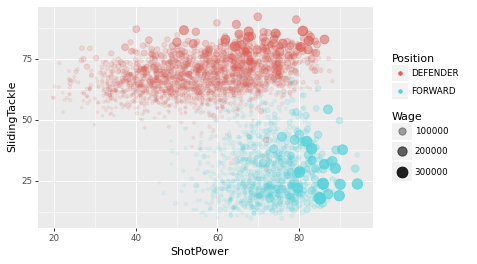

<ggplot: (8734359252306)>

In [103]:
fig = ggplot(my_df.query('Position=="DEFENDER" or Position=="FORWARD"'))
point = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'),position='jitter')
fig + point

# 5. FIFA23 시각화 -- 풀이1

## A. 열의 이름에서 공백제거 

In [107]:
df.columns = df.columns.str.replace(' ','')

## B. 결측치제거 

In [113]:
df = df.loc[:,df.isna().mean()<0.5] # 결측치가 50퍼 이상인 컬럼을 제거

In [114]:
df = df.dropna()

In [115]:
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


## C. Position 칼럼의 변환

In [122]:
x = 'CAM'
[k for k,v in position_dict.items() if x in v][0] # 리스트로 결과가 출력되니까 [0]으로 원소를 뽑아줌.

'MIDFIELDER'

In [125]:
# x를 넣었을 때 'MIDFIELDER'를 출력하는 함수를 만들고 싶음.
df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0])

0        MIDFIELDER
1        MIDFIELDER
2           FORWARD
3        MIDFIELDER
4          DEFENDER
            ...    
16703           RES
16704           RES
16706           RES
16707           RES
16708           SUB
Name: Position, Length: 14398, dtype: object

In [126]:
df['Position'] = df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0])

In [127]:
df.Position.value_counts()

SUB           6009
RES           2396
MIDFIELDER    2188
DEFENDER      2150
FORWARD       1148
GOALKEEPER     507
Name: Position, dtype: int64

## D. Wage 칼럼의 변환

In [128]:
df.Wage

0        €250K
1        €140K
2        €135K
3        €350K
4         €45K
         ...  
16703     €650
16704     €950
16706     €550
16707     €700
16708     €500
Name: Wage, Length: 14398, dtype: object

In [133]:
df.Wage.str[1:].str.replace('K', '000') # object형이 들어감.

0        250000
1        140000
2        135000
3        350000
4         45000
          ...  
16703       650
16704       950
16706       550
16707       700
16708       500
Name: Wage, Length: 14398, dtype: object

In [134]:
df.Wage.str[1:].str.replace('K', '000').astype(int) # int형태로 바꿔준다.

0        250000
1        140000
2        135000
3        350000
4         45000
          ...  
16703       650
16704       950
16706       550
16707       700
16708       500
Name: Wage, Length: 14398, dtype: int64

In [135]:
df['Wage'] = df.Wage.str[1:].str.replace('K','000').astype(int)

## E. 시각화

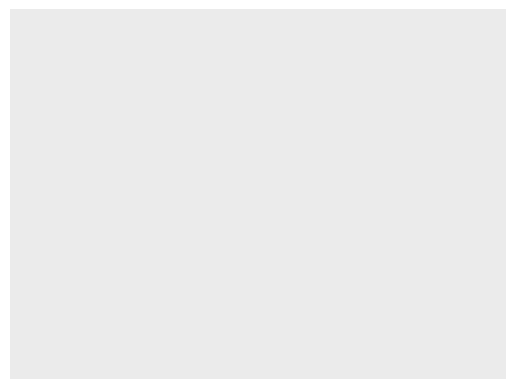

<ggplot: (8734358767270)>

In [140]:
fig = ggplot(df.query('Position=="DEFENDER" or Position=="FORWARD"'))
fig

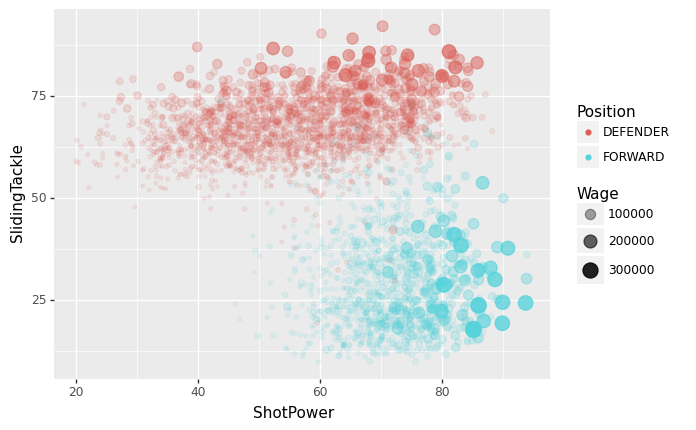

<ggplot: (8734350415857)>

In [149]:
point = geom_point(aes(x='ShotPower', y='SlidingTackle', color='Position', size='Wage', alpha='Wage'), position='jitter')
fig + point

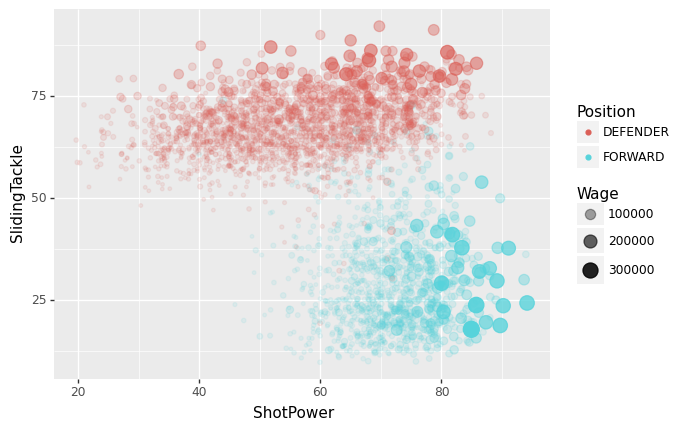

<ggplot: (8734350156927)>

In [152]:
fig = ggplot(df.query('Position=="DEFENDER" or Position=="FORWARD"'))
point = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'),position='jitter')
fig + point

# 6. FIFA23 시각화 -- 망하는 경우

In [153]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

## A. 열의 이름에서 공백제거 

In [154]:
df.columns = df.columns.str.replace(' ','') 

## B. 결측치제거 

`-` 실수로 `df.dropna()`를 먼저 사용.

In [155]:
df = df.dropna() # 2개의 열이 거의 missing인 상태라 모든 관측치가 날라감.

In [156]:
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness


`-` 이럴경우는 다시 처음부터 실행해야함. 

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

In [158]:
df.columns = df.columns.str.replace(' ','')

In [163]:
df = df.loc[:,df.isna().mean()<0.5]

In [164]:
df = df.dropna()

## C. Position 칼럼의 변환

`-` 실수로 아래와 같이 코드를 입력했다고 치자. 

In [167]:
df['Position'] = df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v])
df.Position

0        [MIDFIELDER]
1        [MIDFIELDER]
2           [FORWARD]
3        [MIDFIELDER]
4          [DEFENDER]
             ...     
16703           [RES]
16704           [RES]
16706           [RES]
16707           [RES]
16708           [SUB]
Name: Position, Length: 14398, dtype: object

`-` 하지만 지금와서 고쳐보려고 해봤자 늦음.. 

In [183]:
df['Position'] = df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop())

AttributeError: Can only use .str accessor with string values!

`-` 다시 처음부터.. 

In [172]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.columns = df.columns.str.replace(' ','')
df = df.loc[:,df.isna().mean()<0.5]
df = df.dropna()

In [173]:
# step1
[k for k,v in position_dict.items() if 'CAM' in v][0]

'MIDFIELDER'

In [175]:
# step2
# 'CAM' --> x로 바꾼다. // x가 들어갔을 때 결과를 뱉어주는 함수를 만든다. (lambda)
lambda x: [k for k,v in position_dict.items() if x in v][0]

<function __main__.<lambda>(x)>

In [179]:
# step3
# 이러한 함수를 적용해 준다.
list(map(lambda x: [k for k,v in position_dict.items() if x in v][0], [s.split(">")[-1] for s in df.Position]))[:10]

['MIDFIELDER',
 'MIDFIELDER',
 'FORWARD',
 'MIDFIELDER',
 'DEFENDER',
 'MIDFIELDER',
 'MIDFIELDER',
 'SUB',
 'SUB',
 'MIDFIELDER']

In [171]:
df['Position'] = df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop())
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


# 6-1. Tip

::: {.callout-note}
- 요령1: 데이터를 불러오는 코드부터 시작해서 하나의 셀에 df를 처리하는 코드를 모두 몰아넣어서 처리하는게 유리함. (그래야 덜 당황해요 $\star\star\star\star\star$)
- 요령2: 데이터프레임 자체를 변환시키는 코드를 가급적 작성하지 않음. (제가 좀 더 자주 쓰는 테크닉, 기술이 필요함)
:::

# 7. FIFA23 시각화 -- 풀이2

In [181]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

## A. 열의 이름에서 공백제거 

In [182]:
df.set_axis(df.columns.str.replace(' ',''),axis=1) # 원본 데이터를 손상시키지 X

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


## B. 결측치제거 

In [183]:
_df = df.set_axis(df.columns.str.replace(' ',''),axis=1)
_df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


In [184]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


## C. Position 칼럼의 변환

`_df`는 이전까지 변환시킨 결과값들을 가지고 있음.

In [193]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


## D. Wage 칼럼의 변환

In [194]:
_df = _

In [196]:
# 리스트 컴프리헨션을 써서 해도됨.
list(map(lambda x: int(x[:-1])*1000 if x[-1] == 'K' else int(x), [s[1:] for s in _df.Wage]))[:10]

[250000, 140000, 135000, 350000, 45000, 160000, 61000, 115000, 72000, 190000]

In [197]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))\
.assign(Wage = lambda _df: _df.Wage.str[1:].str.replace('K','000').astype(int))

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


## E. 시각화

In [198]:
tidydata = df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))\
.assign(Wage = lambda _df: _df.Wage.str[1:].str.replace('K','000').astype(int))

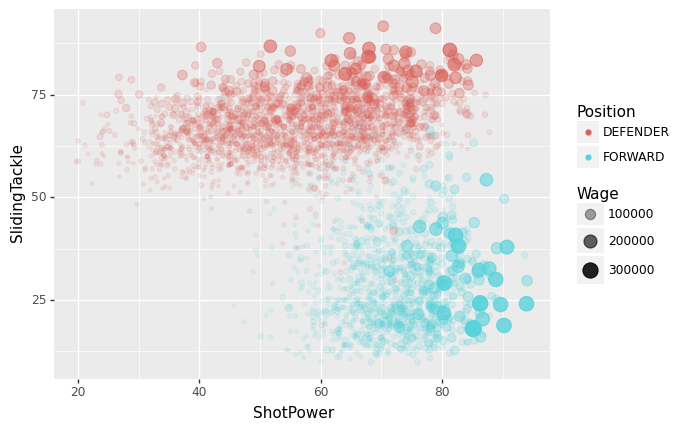

<ggplot: (8734361083877)>

In [199]:
fig = ggplot(tidydata.query('Position=="DEFENDER" or Position=="FORWARD"'))
point = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'),position='jitter')
fig + point

# 8. 숙제

`1`. 

In [200]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
s = df.Wage
s

0        €250K
1        €140K
2        €135K
3        €350K
4         €45K
         ...  
16705      €1K
16706     €550
16707     €700
16708     €500
16709       €0
Name: Wage, Length: 16710, dtype: object

위의 자료형에서 "€250.5K"와 같이 소수점이 포함된 형태의 문자열이 있는지 조사하는 코드를 작성하라. 

**hint**: 아래의 코드를 이용 

In [201]:
"." in "€250.5K"

True

In [3]:
"." in "€250.25K"

True

In [2]:
"." in "€250K"

False

`2`. 

아래와 같은 pd.Series가 있다고 하자. 

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv').iloc[[0,1,16708,16709],:].reset_index()
s = df.Value
s

0    €107.5M
1       €93M
2      €110K
3         €0
Name: Value, dtype: object

아래와 같은 변환을 수행하라. 

|변환전|변환후|
|:---------:|:------|
|    '€107.5M'|107500000|
|       '€93M'|93000000|
|      '€110K'|110000|
|         '€0'|0|

In [24]:
s.str[1:].str.replace('M','*1000000').str.replace('K','*1000')

0    107.5*1000000
1       93*1000000
2         110*1000
3                0
Name: Value, dtype: object

In [23]:
eval('93*1000000')

93000000

**hint** 아래를 이용하면 쉬울껄요?

In [366]:
eval('100*100')

10000